<img src="images/ScDo-Bandeau_Lingua_Technologies.png" style="width: 100%;float:center;"/>

<h1 style="font-size:250%;text-align:center">Prédiction de l'évolution temporelle de la</h1>
<h1 style="font-size:250%;text-align:center">pandémie du COVID-19</h1>
<h1 style="font-size:250%;text-align:center">modèles prédictifs</h1>
<h4 style="font-size:150%;text-align:center">par Claude COULOMBE</h4>
<h5 style="font-size:100%;text-align:center">PhD, scientifique de données, consultant Lingua Technologies</h5>


<img src="images/ScDo-pandas_logo.png" width=400 />

Pour contrer l'anxiété de la pandémie de COVID-19, rien de mieux que d'agir. J'ai donc préparé un petit carnet Web Python, prétexte pour un petit exercice d'exploration de données avec Pandas. Maintenant un petit carnet web IPython avec des modèles prédictifs. 

**Attention!** Je ne suis pas épidémiologiste! Il s'agit d'un exercice «amateur» réalisé comme un loisir scientifique. Je suis ouvert à la discussion pour améliorer mes modèles et pour le plaisir d'apprendre. Aussi ces modèles ne sont bons que pour faire des prédictions à court terme. Par exemple. pour prédire un cycle épidémique, un modèle ARIMA ou d'ajustement de courbes doit disposer d'au moins un cycle complet de données. 

Une autre approche consisterait à se baser sur le comportement de l'épidémie en Chine et ajuster les paramètres aux données locales. J'ignore toutefois si cela donnerait des résultats fiables. 

**Note:** Pour faire des prédictions plus complètes et à plus long terme, des simulations avec des modèles mathématiques à base d'équations différentielles seraient plus appropriées (https://bit.ly/2JEMe3g). D'ailleurs certains paramètres de ces modèles peuvent être extraits des données. Pour avoir une idée du fonctionnment de tels modèles, avec des simulations-jouets, allez voir les capsules vidéos de Grant Sanderson (3Blue1Brown), mon infographiste scientifique préféré: https://bit.ly/33Umjhe

<hr style="height:1px">

**Références:**

COVID-19: Time Series Analysis With ARIMA Modelling<br/>
https://bit.ly/2xK3GAI

Epidemiology and ARIMA model of positive-rate of influenza viruses among children in Wuhan, China: A nine-year retrospective study<br/>
https://bit.ly/3dJAfiJ

Application of the ARIMA model on the COVID-2019 epidemic dataset<br/>
https://bit.ly/2xMfFNR

Forecasting of COVID-19 Confirmed Cases in Different Countries with ARIMA Models<br/>
https://bit.ly/2UTRe9b

<hr style="height:1px">

<h3><i>« Prédire est difficile, surtout lorsqu’il s’agit de l’avenir »</i></h3><br/>
<div style="margin-left:450px">proverbe danois</div>

<hr style="height:1px">

### Importation des bibliothèques utilisées

In [1]:
# Importation des bibliothèques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
%matplotlib inline

print("Bibliothèques importées!")

Bibliothèques importées!


## Données

### Dépôt de données ouvertes du COVID-19 - John Hopkins University


https://github.com/CSSEGISandData/COVID-19

<img src="" style="width: 100%;float:center;"/>

**Note** : Les données contenues dans le répertoire DATA doivent être mise à jour régulièrement pour refléter l'évolution de la pandémie dans le temps. 


### Lecture des données

Nous nous intéressons au fichier `time_series_19-covid-Confirmed.csv` qui contient les données sur les cas confirmés de COVID-19

wget --no-check-certificate https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv?raw=True -O time_series_covid19_confirmed_global.csv

In [2]:
# Note - bonne pratique de postfixer les Dataframe par _df (Rappel: Python n'est pas typé)
series_chronologiques_COVID19_df = pd.read_csv('DATA/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',sep=',')


In [3]:
series_chronologiques_COVID19_df


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1482,1494,1497,1504,1505,1509,1512,1513,1514,1515
268,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,140287,141219,142228,143169,144257,145252,146074,146701,147400,148171
269,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2101,2101,2101,2101,2102,2104,2104,2104,2104,2105
270,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,21230,21582,21993,22645,23495,24297,25326,26567,27728,28596


### Retrait d'attributs «superflus»

Puisque nous nous intéressons à l'évolution du nombre de malades dans le temps, certains attributs (colonnes du tableau de données) sont superflus ou «inutiles» et alourdissent notre analyse.

Ci-dessous une liste d'attributs à retirer:

In [4]:
attributs_a_retirer = ["Lat","Long"]


Retirer les attributs «superflus» avec la fonction `.drop()`

In [5]:
series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.drop(attributs_a_retirer,axis='columns')


In [6]:
series_chronologiques_COVID19_df.head()


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538
1,NaN,Albania,0,0,0,0,0,0,0,0,...,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586
4,NaN,Angola,0,0,0,0,0,0,0,0,...,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254


#### Maintenant, examinons les données pour les différentes provinces canadiennes.

In [7]:
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Canada"]


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
39,Alberta,Canada,0,0,0,0,0,0,0,0,...,100428,104228,105535,106378,107501,108469,109652,110641,111452,112091
40,British Columbia,Canada,0,0,0,0,0,0,1,1,...,51990,51990,54201,54629,55254,56015,56632,56632,56632,58107
41,Diamond Princess,Canada,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,Grand Princess,Canada,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
43,Manitoba,Canada,0,0,0,0,0,0,0,0,...,25026,25126,25244,25374,25541,25742,25963,26166,26316,26450
44,New Brunswick,Canada,0,0,0,0,0,0,0,0,...,611,618,635,662,693,717,735,765,779,800
45,Newfoundland and Labrador,Canada,0,0,0,0,0,0,0,0,...,390,390,391,392,392,392,392,392,393,393
46,Northwest Territories,Canada,0,0,0,0,0,0,0,0,...,24,24,24,24,24,24,24,24,24,24
47,Nova Scotia,Canada,0,0,0,0,0,0,0,0,...,1499,1499,1505,1508,1520,1524,1526,1529,1528,1533
48,Nunavut,Canada,0,0,0,0,0,0,0,0,...,266,266,266,266,266,266,266,266,266,266


### Création d'une entrée supplémentaire spécifique pour le Québec (avec accent aigu) 

In [8]:
quebec_df = series_chronologiques_COVID19_df[(series_chronologiques_COVID19_df['Country/Region']=="Canada") & 
                                (series_chronologiques_COVID19_df['Province/State']=="Quebec")]

quebec_df.loc[51,'Country/Region'] = 'Québec'
quebec_df.loc[51,'Province/State'] = np.nan

series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.append(quebec_df , ignore_index=True)
series_chronologiques_COVID19_df


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,51526,51526,53011,53105,53105,53207,53332,53400,53489,53538
1,NaN,Albania,0,0,0,0,0,0,0,0,...,58991,59438,59623,60283,61008,61705,62378,63033,63595,63971
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,100159,100408,100645,100873,101120,101382,101657,101913,102144,102369
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,8166,8192,8249,8308,8348,8348,8489,8586,8586,8586
4,NaN,Angola,0,0,0,0,0,0,0,0,...,17608,17642,17684,17756,17864,17974,18066,18156,18193,18254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,NaN,West Bank and Gaza,0,0,0,0,0,0,0,0,...,140287,141219,142228,143169,144257,145252,146074,146701,147400,148171
269,NaN,Yemen,0,0,0,0,0,0,0,0,...,2101,2101,2101,2101,2102,2104,2104,2104,2104,2105
270,NaN,Zambia,0,0,0,0,0,0,0,0,...,21230,21582,21993,22645,23495,24297,25326,26567,27728,28596
271,NaN,Zimbabwe,0,0,0,0,0,0,0,0,...,14491,15265,15829,17194,17804,18675,19660,20499,21477,22297


### Regroupement des données des états et provinces
**Note** : Pour avoir un total par pays, nous allons regrouper les états et les provinces d'un même pays. Utilisaton des fonctions `.groupby()` et `.sum()`. Aussi `.reset_index()`

In [9]:
series_chronologiques_COVID19_df = series_chronologiques_COVID19_df.groupby(['Country/Region']).sum().reset_index()


Vérifions que le regroupement est bien effectué, avec les données sur le Canada.

In [10]:
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Canada"]


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
32,Canada,0,0,0,0,1,1,2,2,2,...,589935,606076,616134,623384,631466,639693,648930,657323,664606,672931


In [11]:
series = series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Québec"]
series


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
140,Québec,0,0,0,0,0,0,0,0,0,...,202641,210304,212850,215358,217999,220518,223106,226233,228821,230690


In [12]:
# Correction d'une erreur dans les données du 4 avril 2020
series_chronologiques_COVID19_df.loc[140,'4/4/20']=6997
# Correction des données du 25 et 26 décembre 2020
series_chronologiques_COVID19_df.loc[140,'12/25/20']=185872+2235
series_chronologiques_COVID19_df.loc[140,'12/26/20']=185872+4492
# 2 808 nouveaux cas pour le 31 décembre, 1 986 pour le 1er janvier et de 2 869 pour le 2 janvier, 
series_chronologiques_COVID19_df.loc[140,'12/31/20']=199822+2808
series_chronologiques_COVID19_df.loc[140,'1/1/21']=199822+2808+1986
series_chronologiques_COVID19_df.loc[140,'1/2/21']=199822+2808+1986+2869
series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=="Québec"]


,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21
140,Québec,0,0,0,0,0,0,0,0,0,...,207485,210304,212850,215358,217999,220518,223106,226233,228821,230690


# Modèles prédictifs



## L'évolution de l'épidémie au Québec
Pour des raisons évidente d'intérêt, je me concentrerai sur la prévision de l'évolution de l'épidémie au Québec

Rappel de la série chonologique 

In [13]:
print(list(series))


['Country/Region', '1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20', '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20', '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20', '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20', '4/13/20', '4/14/20', '4/15/20', '4/16/20', '4/17/20', '4/18/20', '4/19/20', '4/20/20', '4/21/20', '4/22/2

In [14]:
def parser(x):
    return pd.datetime.strptime(x, '%m/%d/%y')

series_raw = series_chronologiques_COVID19_df[series_chronologiques_COVID19_df['Country/Region']=='Québec']
print(series_raw)
dates_list = [parser(x) for x in list(series_raw.columns[1:])]
values_list = list((series_raw.values)[0][1:])
# Ici au besoin, on peut ajouter manuellement un nouveau point de données
# lignes commentées
# values_list += [15857]
# dates_list += [parser('4/16/20')]                     
print("-"*90)
print("values_list[-10:]:")
print(list(values_list[-10:]))
print("*"*90)
print("dates_list[-10:]:")
print(dates_list[-10:])
print("-"*90)
series = pd.Series(values_list,index=dates_list)
series.index.name = 'date'
print("series[-10:]:")
print(list(series)[-10:])
print("-"*90)
print("series.index[-10:]:")
print(list(series.index)[-10:])
print("*"*90)


    Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
140         Québec        0        0        0        0        0        0   

     1/28/20  1/29/20  1/30/20  ...  1/2/21  1/3/21  1/4/21  1/5/21  1/6/21  \
140        0        0        0  ...  207485  210304  212850  215358  217999   

     1/7/21  1/8/21  1/9/21  1/10/21  1/11/21  
140  220518  223106  226233   228821   230690  

[1 rows x 357 columns]
------------------------------------------------------------------------------------------
values_list[-10:]:
[207485, 210304, 212850, 215358, 217999, 220518, 223106, 226233, 228821, 230690]
******************************************************************************************
dates_list[-10:]:
[datetime.datetime(2021, 1, 2, 0, 0), datetime.datetime(2021, 1, 3, 0, 0), datetime.datetime(2021, 1, 4, 0, 0), datetime.datetime(2021, 1, 5, 0, 0), datetime.datetime(2021, 1, 6, 0, 0), datetime.datetime(2021, 1, 7, 0, 0), datetime.datetime(2021, 1, 8, 0, 0), datetime

### Affichage de la progression temporelle du nombre de malades confirmés

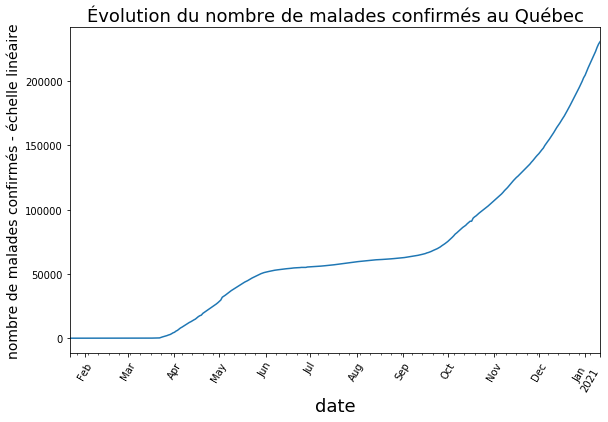

In [15]:
nombre_dor = 1.618
hauteur = 12
longueur = int(nombre_dor * hauteur)

plt.figure(figsize=(longueur/2,hauteur/2))
series.plot()
plt.title("Évolution du nombre de malades confirmés au Québec",fontsize=18)
plt.xlabel("date",fontsize=18)
plt.ylabel("nombre de malades confirmés - échelle linéaire",fontsize=14)
xticks(rotation=60)
plt.show()


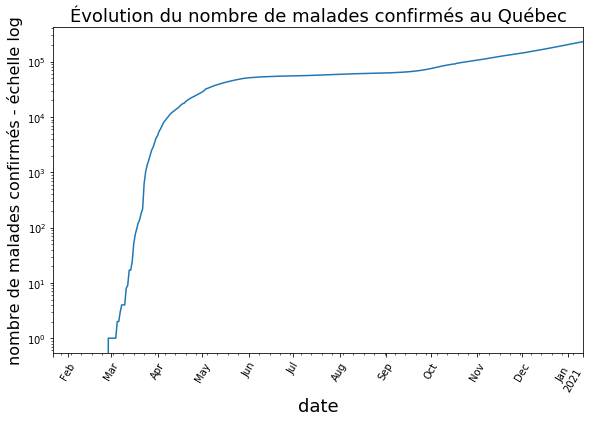

In [16]:
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
xticks(rotation=60)
ax.set_yscale('log')
series.plot()
plt.title("Évolution du nombre de malades confirmés au Québec",fontsize=18)
plt.xlabel("date",fontsize=18)
plt.ylabel("nombre de malades confirmés - échelle log",fontsize=16)
xticks(rotation=60)
plt.show()


 ## Modèle simple basé sur une régression et une fonction exponentielle
 ### Modéliser avec une fonction exponentielle de forme $a e^{bx}+c$ avec la fonction <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html">`scipy.optimize.curve_fit`</a>

In [17]:
nbre_points = 20
print(series[-nbre_points:])

date
2020-12-23    183523
2020-12-24    185872
2020-12-25    188107
2020-12-26    190364
2020-12-27    192665
2020-12-28    194930
2020-12-29    197311
2020-12-30    199822
2020-12-31    202630
2021-01-01    204616
2021-01-02    207485
2021-01-03    210304
2021-01-04    212850
2021-01-05    215358
2021-01-06    217999
2021-01-07    220518
2021-01-08    223106
2021-01-09    226233
2021-01-10    228821
2021-01-11    230690
dtype: int64


[ 2.36475912e+05  9.71806991e-03 -5.30944674e+04]


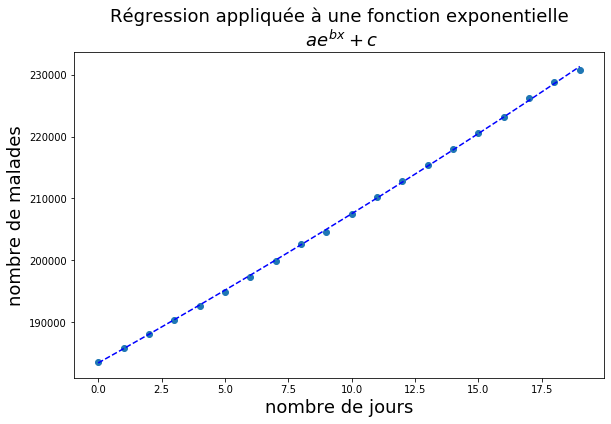

In [18]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

y_data = np.array([y for y in series[-nbre_points:].values if y > 0])
x_data = np.array([x for x in range(len(y_data))])

def func(x, a, b, c):
    return a * np.exp(b * x) + c

popt, pcov = curve_fit(func, x_data, y_data)
print(popt)

plt.figure(figsize=(longueur/2,hauteur/2))
plt.title("Régression appliquée à une fonction exponentielle\n $a e^{bx}+c$",fontsize=18)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)

plt.scatter(x_data, y_data)

_ = plt.plot(x_data, func(x_data, *popt), 'b--',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.show()


In [19]:
def generate_xdata_predictions(x_data,n_predictions):
    longueur_x_data = len(x_data)    
    return [nouv_x for nouv_x in range(longueur_x_data,longueur_x_data+n_predictions)]
    
n_predictions = 3
x_data_list_extended = x_data.tolist() + generate_xdata_predictions(x_data,n_predictions)
x_data_extended = np.array(x_data_list_extended)
print(list(x_data_extended))


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]


------------------------------------------------------------------------------------------
Vraies valeurs:
x=0, y=183523
x=1, y=185872
x=2, y=188107
x=3, y=190364
x=4, y=192665
x=5, y=194930
x=6, y=197311
x=7, y=199822
x=8, y=202630
x=9, y=204616
x=10, y=207485
x=11, y=210304
x=12, y=212850
x=13, y=215358
x=14, y=217999
x=15, y=220518
x=16, y=223106
x=17, y=226233
x=18, y=228821
x=19, y=230690
------------------------------------------------------------------------------------------


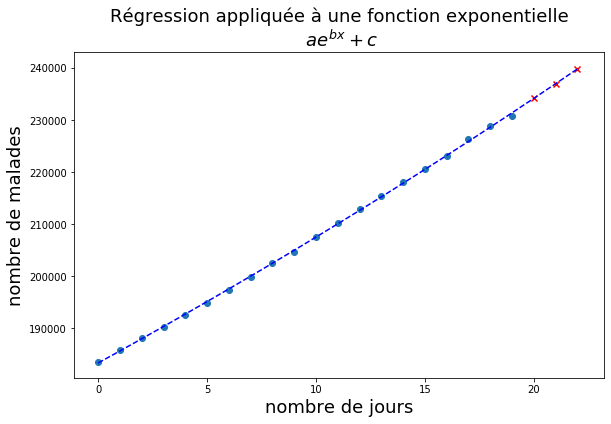

------------------------------------------------------------------------------------------
Prédictions:
x=20, y=234113
x=21, y=236918
x=22, y=239750
------------------------------------------------------------------------------------------


In [20]:
plt.figure(figsize=(longueur/2,hauteur/2))
plt.title("Régression appliquée à une fonction exponentielle\n $a e^{bx}+c$",fontsize=18)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)

predictions = func(x_data_extended, *popt)

plt.scatter(x_data, y_data)

print("-"*90)
print("Vraies valeurs:")
for index in range(len(y_data)):
    print('x=%i, y=%i' % (index,y_data[index]))
print("-"*90)

plt.scatter(x_data_extended[-n_predictions:], predictions[-n_predictions:],marker="x",color="r")

_ = plt.plot(x_data_extended, predictions, 'b--',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

plt.show()

print("-"*90)
print("Prédictions:")
for index in range(len(x_data),len(x_data_extended)):
    print('x=%i, y=%i' % (index,predictions[index]))
print("-"*90)


In [21]:
prediction_regNonLin_exp = int(predictions[len(x_data)])
prediction_regNonLin_exp


234113

## Modèle ARIMA

Une méthode statistique populaire pour la prévision des séries chronologiques est le modèle ARIMA, un acronyme qui signifie AutoRegressive Integrated Moving Average, en français modèle de moyenne mobile autorégressive. Il s'agit d'une classe de modèle qui capture une suite de différentes structures temporelles dans les données d'une série chronologique. 

Trois hyperparamètres contrôlent l'algorithme ARIMA 

* p: l'ordre du modèle autorégressif (correspond au nombre de périodes antérieuses considérées)
* d: le degré de différenciation des observations brutes (soustraction d'une observation au temps t à une observation à la période de temps précédente t-1) afin de rendre la série chronologique stationnaire
* q: l'ordre de la moyenne mobile (dépendance entre une observation et l'erreur résiduelle d'une moyenne mobile apppliquée aux observations antérieures) 

Référence : 

* https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average

* https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/


### Autocorrélation
Nous pouvons calculer la corrélation pour les observations de séries chronologiques avec des observations avec des périodes de temps précédentes, appelés périodes antérieures (en anglais, lag). Étant donné que la corrélation des observations de la série chronologique est calculée avec des valeurs de la même série à des périodes antérieures, cela s'appelle une autocorrélation, (en anglais. Autocorrelation Function, ACF).

Ci-dessous, calcul et affichage de l'autocorrélation avec la fonction `.autocorrelation_plot()` de la bibliothèque Pandas.

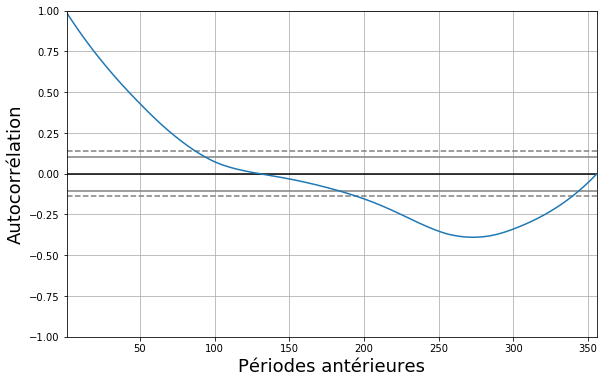

In [22]:
from pandas import read_csv
from pandas import datetime
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(longueur/2,hauteur/2))
autocorrelation_plot(series)
plt.xlabel(u'Périodes antérieures',fontsize=18)
plt.ylabel(u'Autocorrélation',fontsize=18)
plt.show()


Le même calcul et affichage de l'autocorrélation avec la fonction `.plot_acf()` de la bibliothèque statsmodels.

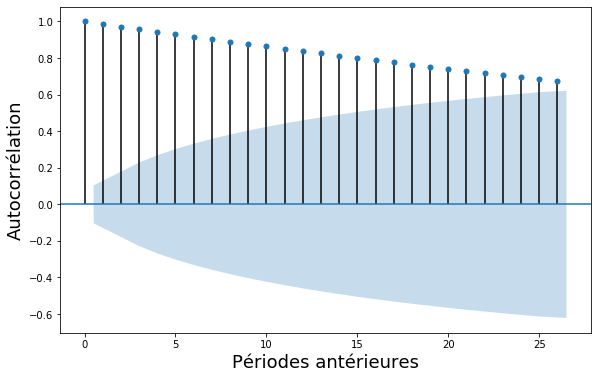

In [23]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
plot_acf(series,title='',ax=ax)
plt.xlabel(u'Périodes antérieures',fontsize=18)
plt.ylabel(u'Autocorrélation',fontsize=18)
plt.show()


### Autocorrélation partielle
Une autocorrélation partielle (en anglais. Partial Autocorrelation Function, PACF) est un résumé de la relation entre une observation dans une série chronologique avec des observations à des périodes antérieures en supprimant les relations des observations intermédiaires. Utilisation de avec la fonction `.plot_pacf()` de la bibliothèque statsmodels.

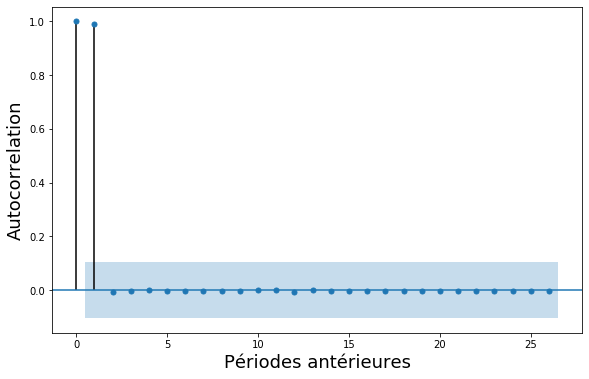

In [24]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(longueur/2,hauteur/2))
try:
    plot_pacf(series,title='',ax=ax)
    plt.xlabel(u'Périodes antérieures',fontsize=18)
    plt.ylabel(u'Autocorrelation',fontsize=18)
    plt.show()
except:
    print("Matrice singulière")
    # Ajout de bruit
    series = series+1.0e-09*np.random.rand(series.shape[0])
    plot_pacf(series,title='',ax=ax)
    plt.xlabel(u'Périodes antérieures',fontsize=18)
    plt.ylabel(u'Autocorrelation',fontsize=18)
    plt.show()


### Auto ARIMA

Auto ARIMA calcule les meilleurs modèles ARIMA à partir des données et de contraintes sur les hyperparamètres (p,d,q) de ARIMA selon diférents critères comme le <a href="https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike">critère d'information d'Akaike</a> (Akaike information criterion ou AIC) 

Installer la bibliothèque Python auto_arima

#> sudo pip3 install pyramid-arima - deprecated

   > sudo pip3 install pmdarima
   
Documentation: https://alkaline-ml.com/pmdarima/0.9.0/tips_and_tricks.html#tips-and-tricks

Prise en main rapide: https://alkaline-ml.com/pmdarima/0.9.0/quickstart.html


In [25]:
from io import StringIO
import sys

sortie_standard = sys.stdout
sortie_autoarima = StringIO()
sys.stdout =  sortie_autoarima

# import pyramid as pm - deprecated
import pmdarima as pm
print("pmdarima version:",pm.__version__)
print()
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Entraîner auto-ARIMA
meilleur_ARIMA = pm.auto_arima(series, start_p=1, start_q=1,
                               max_p=3, max_q=3, m=100,
                               start_P=0, seasonal=False,
                               d=1, D=1, trace=True,
                               error_action='ignore',  # pas de message d'erreur sur
                               suppress_warnings=True, # pas de message de non convergence
                               stepwise=True)  # calcul pas à pas

# Restaurer la sortie standard
sys.stdout = sortie_standard

# Récupérer la sortie autoarima 
sortie_autoarima_str = sortie_autoarima.getvalue()

print(sortie_autoarima_str)

meilleur_ARIMA.summary()


/usr/local/lib/python3.6/dist-packages/pmdarima/arima/_validation.py:60: UserWarning: m (100) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


pmdarima version: 1.7.1

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4741.232, Time=0.73 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5663.984, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4901.491, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5380.287, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5882.045, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4732.743, Time=0.68 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=4797.646, Time=0.27 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4724.736, Time=1.11 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4721.234, Time=1.07 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4721.844, Time=0.93 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.98 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4721.155, Time=1.31 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4719.147, Time=1.30 sec
 ARIMA(0,1,3)(0,0,

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  356
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -2354.079
Date:                Tue, 12 Jan 2021   AIC                           4718.158
Time:                        03:31:13   BIC                           4737.519
Sample:                             0   HQIC                          4725.860
                                - 356                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.003    338.586      0.000       0.994       1.006
ma.L1         -0.8765      0.026    -33.827      0.000      -0.927      -0.826
ma.L2          0.1269      0.039      3.287      0.001       0.051       0.203
ma.L3          0.1510      0.038      3.969      0.000       0.076       0.226
sigma2      3.333e+04    957.749     34.797      0.000    3.15e+04    3.52e+04
===================================================================================
Ljung-Box (Q):                       40.49   Jarque-Bera (JB):              6647.54
Prob(Q):                              0.45   Prob(JB):                         0.00
Heteroskedasticity (H):               1.91   Skew:                             1.78
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [26]:
import re

liste_resultats_ARIMA = sortie_autoarima_str.split('\n')
# motif_extraction = "order=\((\d),\s(\d),\s(\d)\);\s*AIC=(\d*\.\d*|nan)" 
motif_extraction = "ARIMA\((\d),(\d),(\d)\).*AIC=(\d*\.\d*|nan)" 

p = re.compile(motif_extraction)

meilleurs_ARIMA_dict = {}
for resultat_ARIMA_brut in liste_resultats_ARIMA:
    if p.findall(resultat_ARIMA_brut):
        resultat_ARIMA = p.findall(resultat_ARIMA_brut)[0]
        arima_etiq = "_".join(resultat_ARIMA[:3])
        aic = resultat_ARIMA[3]
        if aic == "nan":
            aic = 10000000
        meilleurs_ARIMA_dict[arima_etiq]=int(float(aic))
meilleurs_ARIMA_list = list({k: v for k, v in sorted(meilleurs_ARIMA_dict.items(), key=lambda item: item[1])})
#meilleurs_ARIMA_list[:2]

meilleurs_ARIMA = []
#for meilleur_arima in meilleurs_ARIMA_list[:2]:
for meilleur_arima in meilleurs_ARIMA_list:
    print(meilleur_arima.split('_'))
    meilleurs_ARIMA += [tuple([int(carac) for carac in meilleur_arima.split('_')])]
meilleurs_ARIMA


['1', '1', '3']
['3', '1', '2']
['2', '1', '2']
['3', '1', '1']
['1', '1', '2']
['2', '1', '3']
['2', '1', '1']
['1', '1', '1']
['2', '1', '0']
['1', '1', '0']
['0', '1', '3']
['0', '1', '2']
['0', '1', '1']
['0', '1', '0']


[(1, 1, 3),
 (3, 1, 2),
 (2, 1, 2),
 (3, 1, 1),
 (1, 1, 2),
 (2, 1, 3),
 (2, 1, 1),
 (1, 1, 1),
 (2, 1, 0),
 (1, 1, 0),
 (0, 1, 3),
 (0, 1, 2),
 (0, 1, 1),
 (0, 1, 0)]

In [27]:
meilleurs_ARIMA

[(1, 1, 3),
 (3, 1, 2),
 (2, 1, 2),
 (3, 1, 1),
 (1, 1, 2),
 (2, 1, 3),
 (2, 1, 1),
 (1, 1, 1),
 (2, 1, 0),
 (1, 1, 0),
 (0, 1, 3),
 (0, 1, 2),
 (0, 1, 1),
 (0, 1, 0)]

### Entraînement du meilleur modèle ARIMA

Le critère de sélection selon le <a href="https://fr.wikipedia.org/wiki/Crit%C3%A8re_d%27information_d%27Akaike">critère d'information d'Akaike</a> (Akaike information criterion ou AIC). On ne conserve que les deux ou trois meilleurs modèles ARIMAselon ce critère qui doit être minimisé.

Certains modèles ARIMA sont retirés car ils ne convergent pas (`LinAlgError: SVD did not converge`) ou parce que le modèle n'est pas stationnaire.

Taille du jeu de données de test= 109
******************************************************************************************
Modèle ARIMA: (1, 1, 3)
Nombre de jours écoulés=210, t=0, prédiction=70187, vraie valeur=70307
Nombre de jours écoulés=211, t=1, prédiction=70855, vraie valeur=71005
Nombre de jours écoulés=212, t=2, prédiction=71604, vraie valeur=71901
Nombre de jours écoulés=213, t=3, prédiction=72598, vraie valeur=72651
Nombre de jours écoulés=214, t=4, prédiction=73395, vraie valeur=73450
Nombre de jours écoulés=215, t=5, prédiction=74237, vraie valeur=74288
Nombre de jours écoulés=216, t=6, prédiction=75091, vraie valeur=75221
Nombre de jours écoulés=217, t=7, prédiction=76061, vraie valeur=76273
Nombre de jours écoulés=218, t=8, prédiction=77178, vraie valeur=77380
Nombre de jours écoulés=219, t=9, prédiction=78365, vraie valeur=78459
Nombre de jours écoulés=220, t=10, prédiction=79503, vraie valeur=79650
Nombre de jours écoulés=221, t=11, prédiction=80759, vraie valeur

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:670: RuntimeWarning: invalid value encountered in double_scalars
  (1-a**2)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/tsatools.py:672: RuntimeWarning: divide by zero encountered in arctanh
  invarcoefs = 2*np.arctanh(params)


*** Erreur! ***
Modèle ARIMA: (2, 1, 2)
Nombre de jours écoulés=210, t=0, prédiction=70189, vraie valeur=70307
Nombre de jours écoulés=211, t=1, prédiction=70862, vraie valeur=71005
Nombre de jours écoulés=212, t=2, prédiction=71609, vraie valeur=71901
*** Erreur! ***
Modèle ARIMA: (3, 1, 1)
Nombre de jours écoulés=210, t=0, prédiction=70175, vraie valeur=70307
Nombre de jours écoulés=211, t=1, prédiction=70850, vraie valeur=71005
Nombre de jours écoulés=212, t=2, prédiction=71605, vraie valeur=71901
Nombre de jours écoulés=213, t=3, prédiction=72599, vraie valeur=72651
Nombre de jours écoulés=214, t=4, prédiction=73389, vraie valeur=73450
Nombre de jours écoulés=215, t=5, prédiction=74220, vraie valeur=74288
Nombre de jours écoulés=216, t=6, prédiction=75070, vraie valeur=75221
Nombre de jours écoulés=217, t=7, prédiction=76049, vraie valeur=76273
Nombre de jours écoulés=218, t=8, prédiction=77178, vraie valeur=77380
Nombre de jours écoulés=219, t=9, prédiction=78367, vraie valeur=784

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Nombre de jours écoulés=222, t=12, prédiction=82203, vraie valeur=81914
Nombre de jours écoulés=223, t=13, prédiction=83059, vraie valeur=82992
Nombre de jours écoulés=224, t=14, prédiction=84107, vraie valeur=84094
Nombre de jours écoulés=225, t=15, prédiction=85172, vraie valeur=85191
*** Erreur! ***
Modèle ARIMA: (2, 1, 1)
Nombre de jours écoulés=210, t=0, prédiction=70171, vraie valeur=70307
Nombre de jours écoulés=211, t=1, prédiction=70855, vraie valeur=71005
Nombre de jours écoulés=212, t=2, prédiction=71606, vraie valeur=71901
Nombre de jours écoulés=213, t=3, prédiction=72599, vraie valeur=72651
Nombre de jours écoulés=214, t=4, prédiction=73392, vraie valeur=73450
Nombre de jours écoulés=215, t=5, prédiction=74203, vraie valeur=74288
Nombre de jours écoulés=216, t=6, prédiction=75067, vraie valeur=75221
Nombre de jours écoulés=217, t=7, prédiction=76049, vraie valeur=76273
Nombre de jours écoulés=218, t=8, prédiction=77181, vraie valeur=77380
Nombre de jours écoulés=219, t=9,

Nombre de jours écoulés=295, t=85, prédiction=174571, vraie valeur=174839
Nombre de jours écoulés=296, t=86, prédiction=176684, vraie valeur=176985
Nombre de jours écoulés=297, t=87, prédiction=179025, vraie valeur=179093
Nombre de jours écoulés=298, t=88, prédiction=181176, vraie valeur=181276
Nombre de jours écoulés=299, t=89, prédiction=183373, vraie valeur=183523
Nombre de jours écoulés=300, t=90, prédiction=185692, vraie valeur=185872
Nombre de jours écoulés=301, t=91, prédiction=188124, vraie valeur=188107
Nombre de jours écoulés=302, t=92, prédiction=190363, vraie valeur=190364
Nombre de jours écoulés=303, t=93, prédiction=192569, vraie valeur=192665
Nombre de jours écoulés=304, t=94, prédiction=194903, vraie valeur=194930
Nombre de jours écoulés=305, t=95, prédiction=197177, vraie valeur=197311
Nombre de jours écoulés=306, t=96, prédiction=199592, vraie valeur=199822
Nombre de jours écoulés=307, t=97, prédiction=202228, vraie valeur=202630
Nombre de jours écoulés=308, t=98, pré

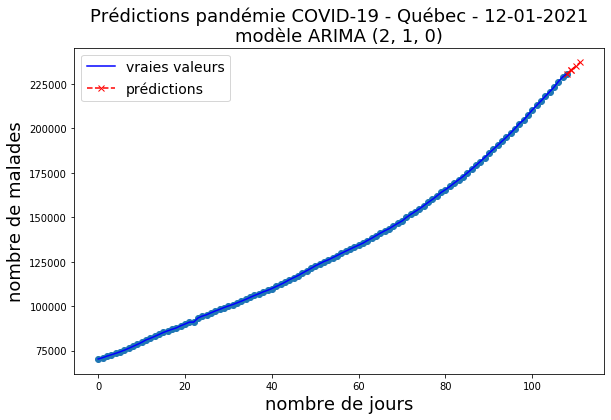

******************************************************************************************


In [28]:
from pandas import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from numpy.linalg import LinAlgError
from math import sqrt

X = series.values
X = [x for x in X if x > 0]

# Ici au besoin, on peut ajouter manuellement un nouveau point de données
# X += [3430]
taille_entrainement_data = int(len(X) * 0.66)
print("Taille du jeu de données de test=",len(X)-taille_entrainement_data)

# Séparation entre jeu de données d'entraînement et jeu de données de test
entrainement_data, test_data = X[0:taille_entrainement_data], X[taille_entrainement_data:len(X)]

predictions_ARIMA = {}
print("*"*90)

for meilleur_ARIMA in meilleurs_ARIMA:
    drapeau_erreur = False
    print("Modèle ARIMA:",meilleur_ARIMA)
    historique = [x for x in entrainement_data]
    predictions = list()
    nbr_predictions = 3
    nbr_jours_init = len(X)-len(test_data)

    for t in range(len(test_data)+nbr_predictions):
        try:
            modele_ARIMA = ARIMA(historique, order=meilleur_ARIMA)
            modele_ARIMA_entraine = modele_ARIMA.fit(disp=0)
            sortie = modele_ARIMA_entraine.forecast()
            une_prediction = sortie[0]
            predictions.append(une_prediction)
            if t < len(test_data):
                vraie_valeur = test_data[t]
                historique.append(vraie_valeur)
                print('Nombre de jours écoulés=%i, t=%i, prédiction=%i, vraie valeur=%i' % (nbr_jours_init+t,t,une_prediction,vraie_valeur))
            else:
                historique.append(une_prediction)
                print("meilleur_ARIMA",meilleur_ARIMA)
                etiq_ARIMA = "_".join([str(hyperparam) for hyperparam in meilleur_ARIMA])
                if not etiq_ARIMA in predictions_ARIMA.keys():
                    predictions_ARIMA[etiq_ARIMA]=int(une_prediction)
                print('Nombre de jours écoulés=%i, t=%i, prédiction=%i' % (nbr_jours_init+t,t,une_prediction))
        except:
            print("*** Erreur! ***")
            drapeau_erreur = True
            break
    if drapeau_erreur:
        continue
    else:   
        # Évaluation de l'erreur de prédiction
        rmse = sqrt(mean_squared_error(test_data, predictions[:-nbr_predictions]))
        print('Test RMSE: %.3f' % rmse)
        # Afficher les vraies valeurs et les prédictions pour le jeu de données de test
        plt.figure(figsize=(longueur/2,hauteur/2))
        date = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
        plt.title(u"Prédictions pandémie COVID-19 - Québec - " + date + "\n" + 
                  "modèle ARIMA (" + etiq_ARIMA.replace("_",", ") + ")",fontsize=18)
        x_data = list(range(len(test_data)))
        x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
        plt.scatter(x_data,test_data)
        plt.plot(test_data,color='blue',label="vraies valeurs")
        plt.plot(x_data_extension[-nbr_predictions:],
                 predictions[-nbr_predictions:],
                 "r--",marker="x",label="prédictions")
        point1 = [x_data[-1], test_data[-1]]
        point2 = [x_data_extension[0],int(predictions[-nbr_predictions])]
        x_values = [point1[0], point2[0]]
        y_values = [point1[1], point2[1]]
        plt.plot(x_values, y_values,"r--",marker="x")
        plt.legend(loc='best',fontsize=14)
        plt.xlabel("nombre de jours",fontsize=18)
        plt.ylabel("nombre de malades",fontsize=18)
        plt.show()
        print("*"*90)
        break

### Afficher les vraies valeurs et la prédiction pour demain

#### Modèle meilleurs ARIMA seulement

In [29]:
# Composante du modèle exponentiel
ponderation_exp = 0
total_predictions = prediction_regNonLin_exp * ponderation_exp
#total_predictions = 0 
# print("Prédictions régr. non-lin.: ",prediction_regNonLin_exp)
for etiq_ARIMA in predictions_ARIMA.keys():
    print("Prédictions ARIMA: (" + etiq_ARIMA.replace("_",", ") + ") : " + str(predictions_ARIMA[etiq_ARIMA]))
    total_predictions += predictions_ARIMA[etiq_ARIMA]
print("Prédictions pour "+(dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y"))
# Modèle exponentiel utilisé avant le 1er avril 2020
# ligne commentée
prediction_pur_ARIMA = int(total_predictions/(len(predictions_ARIMA)+1*ponderation_exp))
print(" => ",prediction_pur_ARIMA," <= ")
#print(" => ",int(total_predictions/len(predictions_ARIMA))," <= ")


Prédictions ARIMA: (2, 1, 0) : 232901
Prédictions pour 12-01-2021
 =>  232901  <= 


### Afficher les vraies valeurs et la prédiction pour demain

#### Modèle meilleurs ARIMA

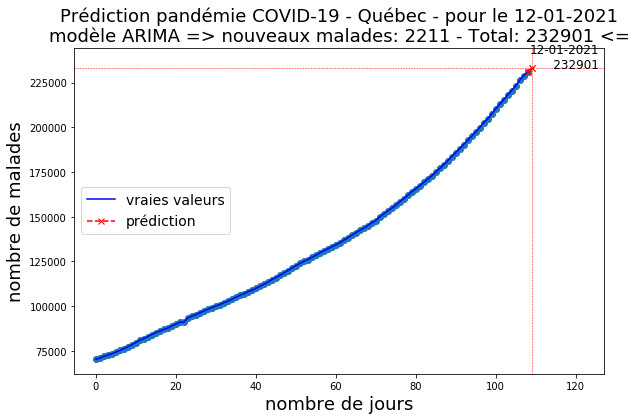

In [30]:
plt.figure(figsize=(longueur/2,hauteur/2))
date_demain = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
prediction_demain = prediction_pur_ARIMA
x_data = list(range(len(test_data)))
x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
plt.scatter(x_data,test_data)
plt.plot(test_data,color='blue',label="vraies valeurs")
point1 = [x_data[-1], test_data[-1]]
point2 = [x_data_extension[0],prediction_demain]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values,"r--",marker="x",label="prédiction")
plt.axhline(prediction_demain,linestyle='--',linewidth=0.5,color='r')
plt.axvline(x=point2[0],linestyle='--',linewidth=0.5,color='r')
plt.text(point2[0]-0.5, point2[1], date_demain + "\n" +" "*6 + str(prediction_demain),fontsize=12)
plt.plot(x_values, y_values,"r--",marker="x")
xlim(right=point2[0]+x_values[-1]/6)
ylim(top=point2[1]+y_values[-1]/20)
plt.legend(loc='best',fontsize=14)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)
plt.title(u"Prédiction pandémie COVID-19 - Québec - pour le " + date_demain + "\n" + 
          "modèle ARIMA => nouveaux malades: " + str(prediction_demain-test_data[-1]) + " - Total: "+ str(prediction_demain) + " <=",fontsize=18)
plt.savefig('images/Prediction-ARIMA_seul-COVID19-Quebec.png')
plt.show()


## Modèle combiné 

Moyenne des prédictions du meilleur modèle ARIMA plus une partie exponentielle issue d'un calcul de régression non linéaire. 

Les résultats depuis quelques mois semblent confirmer que le modèle combiné est plus réaliste, du moins à ce stade de l'épidémie au Québec.

In [31]:
# Composante du modèle exponentiel
ponderation_exp = 1.0
total_predictions = prediction_regNonLin_exp * ponderation_exp
print("Prédictions régr. non-lin.: ",prediction_regNonLin_exp)
print("Prédictions ARIMA: ",prediction_pur_ARIMA)
total_predictions += prediction_pur_ARIMA
print("Prédictions pour "+(dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y"))
# Modèle exponentiel utilisé avant le 1er avril 2020
# ligne commentée
prediction_modele_combine = int(total_predictions/2)
print("Nouveaux malades => ",prediction_modele_combine-y_data[-1]," <= ")


Prédictions régr. non-lin.:  234113
Prédictions ARIMA:  232901
Prédictions pour 12-01-2021
Nouveaux malades =>  2817  <= 


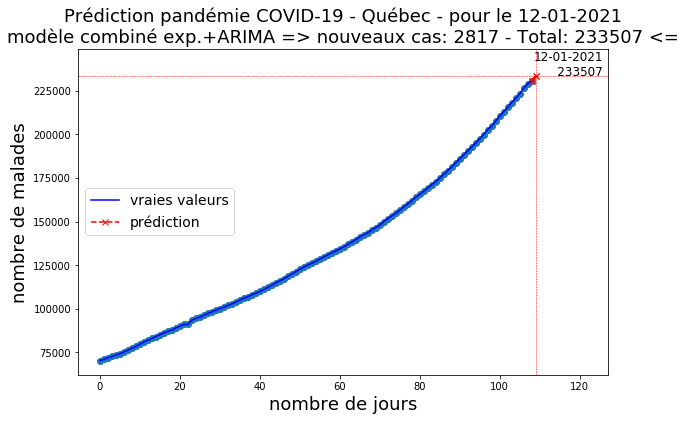

In [32]:
plt.figure(figsize=(longueur/2,hauteur/2))
date_demain = (dates_list[-1]+pd.Timedelta(days=1)).strftime("%d-%m-%Y")
prediction_demain = prediction_modele_combine
x_data = list(range(len(test_data)))
x_data_extension = list(range(len(test_data)+nbr_predictions))[-nbr_predictions:]
plt.scatter(x_data,test_data)
plt.plot(test_data,color='blue',label="vraies valeurs")
point1 = [x_data[-1], test_data[-1]]
point2 = [x_data_extension[0],prediction_demain]
x_values = [point1[0], point2[0]]
y_values = [point1[1], point2[1]]
plt.plot(x_values, y_values,"r--",marker="x",label="prédiction")
plt.axhline(prediction_demain,linestyle='--',linewidth=0.5,color='r')
plt.axvline(x=point2[0],linestyle='--',linewidth=0.5,color='r')
plt.text(point2[0]-0.5, point2[1], date_demain + "\n" +" "*6 + str(prediction_demain),fontsize=12)
plt.plot(x_values, y_values,"r--",marker="x")
xlim(right=point2[0]+x_values[-1]/6)
ylim(top=point2[1]+y_values[-1]/15)
plt.legend(loc='best',fontsize=14)
plt.xlabel("nombre de jours",fontsize=18)
plt.ylabel("nombre de malades",fontsize=18)
plt.title(u"Prédiction pandémie COVID-19 - Québec - pour le " + date_demain + "\n" + 
          "modèle combiné exp.+ARIMA => nouveaux cas: " + str(prediction_demain-test_data[-1]) + " - Total: "+ str(prediction_demain) + " <=",fontsize=18)
plt.savefig('images/Prediction-modele_combine-COVID19-Quebec.png')
plt.show()
